<a href="https://colab.research.google.com/github/sandeep5432/prodigy-infotech/blob/main/TASK-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [3]:
bank=pd.read_csv('/content/drive/MyDrive/bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
bank[bank.isnull().any(axis=1)].count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


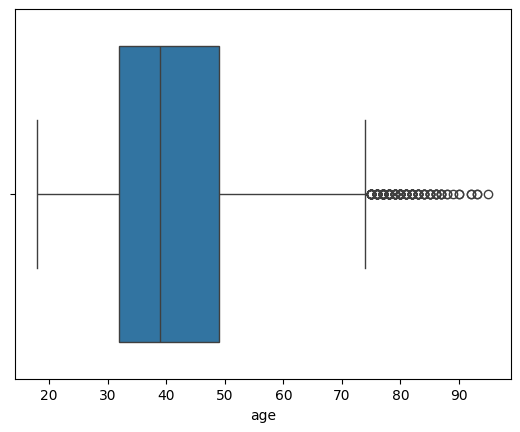

In [6]:
g = sns.boxplot(x=bank["age"])

<Axes: xlabel='age', ylabel='Count'>

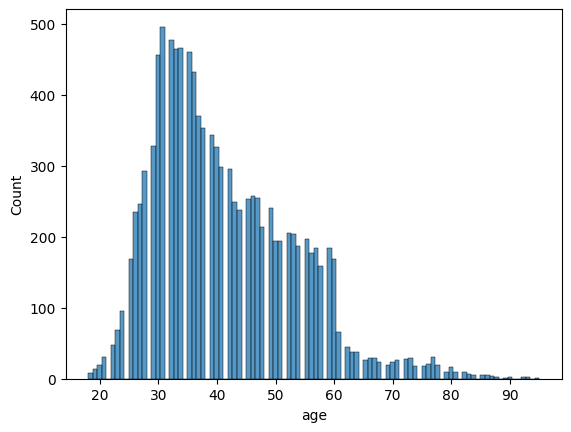

In [10]:
sns.histplot(bank.age, bins=100)

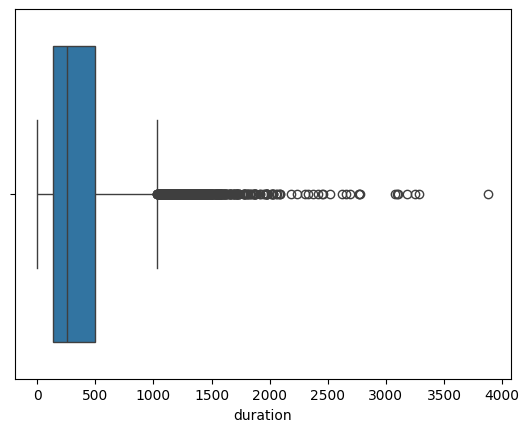

In [11]:
g = sns.boxplot(x=bank["duration"])

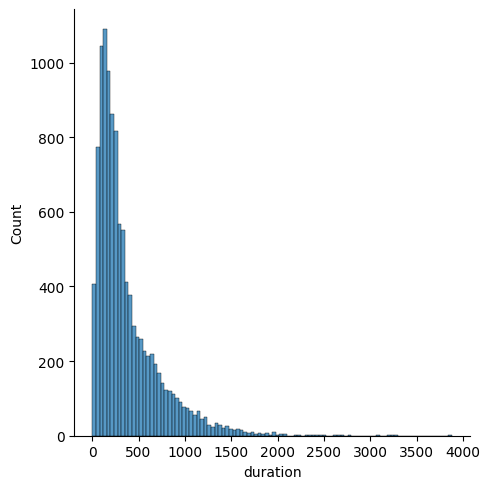

In [16]:
sns.displot(bank.duration, bins=100)

In [17]:
bank_data = bank.copy()

In [18]:
jobs = ['management','blue-collar','technician','admin.','services','retired','self-employed','student',\
        'unemployed','entrepreneur','housemaid','unknown']

for j in jobs:
    print("{:15} : {:5}". format(j, len(bank_data[(bank_data.deposit == "yes") & (bank_data.job ==j)])))

management      :  1301
blue-collar     :   708
technician      :   840
admin.          :   631
services        :   369
retired         :   516
self-employed   :   187
student         :   269
unemployed      :   202
entrepreneur    :   123
housemaid       :   109
unknown         :    34


In [19]:
bank_data.job.value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [20]:
bank_data['job'] = bank_data['job'].replace(['management', 'admin.'], 'white-collar')
bank_data['job'] = bank_data['job'].replace(['services','housemaid'], 'pink-collar')
bank_data['job'] = bank_data['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

In [21]:
bank_data.job.value_counts()

job
white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: count, dtype: int64

In [22]:
bank_data.poutcome.value_counts()

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

In [23]:
bank_data['poutcome'] = bank_data['poutcome'].replace(['other'] , 'unknown')
bank_data.poutcome.value_counts()

poutcome
unknown    8863
failure    1228
success    1071
Name: count, dtype: int64

In [24]:
bank_data.drop('contact', axis=1, inplace=True)

In [25]:
bank_data["default"]
bank_data['default_cat'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)

In [26]:
bank_data["housing_cat"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)

In [27]:
bank_data["loan_cat"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)

In [28]:
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

In [29]:
bank_data["deposit_cat"] = bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit', axis=1, inplace=True)

In [30]:
print("Customers that have not been contacted before:", len(bank_data[bank_data.pdays==-1]))
print("Maximum values on padys    :", bank_data['pdays'].max())

Customers that have not been contacted before: 8324
Maximum values on padys    : 854


In [31]:
bank_data.loc[bank_data['pdays'] == -1, 'pdays'] = 10000

In [32]:
bank_data['recent_pdays'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)
bank_data.drop('pdays', axis=1, inplace = True)

In [33]:
bank_data.tail()

,age,job,marital,education,balance,duration,campaign,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays
11157,33,blue-collar,single,primary,1,257,1,0,unknown,0,1,0,0,0.000100
11158,39,pink-collar,married,secondary,733,83,4,0,unknown,0,0,0,0,0.000100
11159,32,technician,single,secondary,29,156,2,0,unknown,0,0,0,0,0.000100
11160,43,technician,married,secondary,0,9,2,5,failure,0,0,1,0,0.005814
11161,34,technician,married,secondary,0,628,1,0,unknown,0,0,0,0,0.000100


In [34]:
bank_with_dummies = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])
bank_with_dummies.head()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,1,0,1,0.0001,...,False,True,False,False,True,False,False,False,False,True
1,56,45,1467,1,0,0,0,0,1,0.0001,...,False,True,False,False,True,False,False,False,False,True
2,41,1270,1389,1,0,0,1,0,1,0.0001,...,False,True,False,False,True,False,False,False,False,True
3,55,2476,579,1,0,0,1,0,1,0.0001,...,False,True,False,False,True,False,False,False,False,True
4,54,184,673,2,0,0,0,0,1,0.0001,...,False,True,False,False,False,True,False,False,False,True


In [35]:
bank_with_dummies.shape

(11162, 27)

In [36]:
bank_with_dummies.describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421,0.832557,0.015051,0.473123,0.130801,0.473840,0.003124
std,11.913369,3225.413326,347.128386,2.722077,2.292007,0.121761,0.499299,0.337198,0.499338,0.030686
min,18.000000,-6847.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100
25%,32.000000,122.000000,138.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100
50%,39.000000,550.000000,255.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100
75%,49.000000,1708.000000,496.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.001919
max,95.000000,81204.000000,3881.000000,63.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000


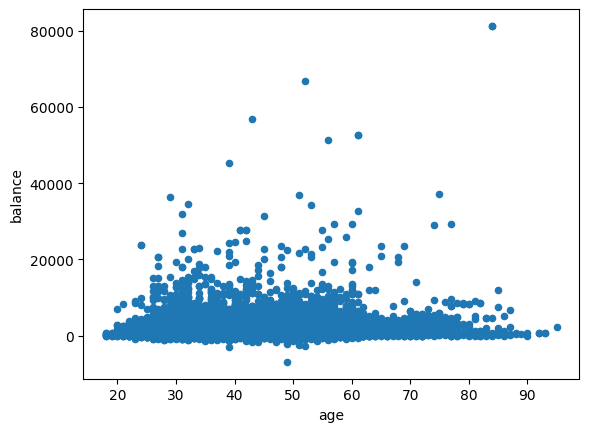

In [37]:
bank_with_dummies.plot(kind='scatter', x='age', y='balance');

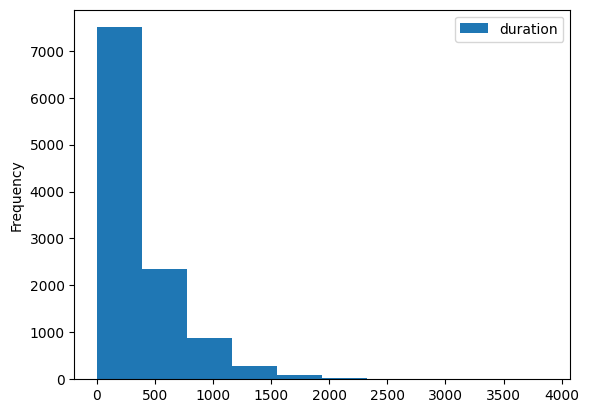

In [38]:
bank_with_dummies.plot(kind='hist', x='poutcome_success', y='duration');

In [39]:
bank_with_dummies[bank_data.deposit_cat == 1].describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,5289.000000
mean,41.670070,1804.267915,537.294574,2.141047,1.170354,0.009832,0.365854,0.091511,1.0,0.004238
std,13.497781,3501.104777,392.525262,1.921826,2.553272,0.098676,0.481714,0.288361,0.0,0.035686
min,18.000000,-3058.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100
25%,31.000000,210.000000,244.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100
50%,38.000000,733.000000,426.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100
75%,50.000000,2159.000000,725.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.005128
max,95.000000,81204.000000,3881.000000,32.000000,58.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [40]:
len(bank_with_dummies[(bank_with_dummies.deposit_cat == 1) & (bank_with_dummies.loan_cat) & (bank_with_dummies.housing_cat)])

265

In [41]:
len(bank_with_dummies[(bank_with_dummies.deposit_cat == 1) & (bank_with_dummies.default_cat ==1)])

52

<Axes: xlabel='job', ylabel='deposit_cat'>

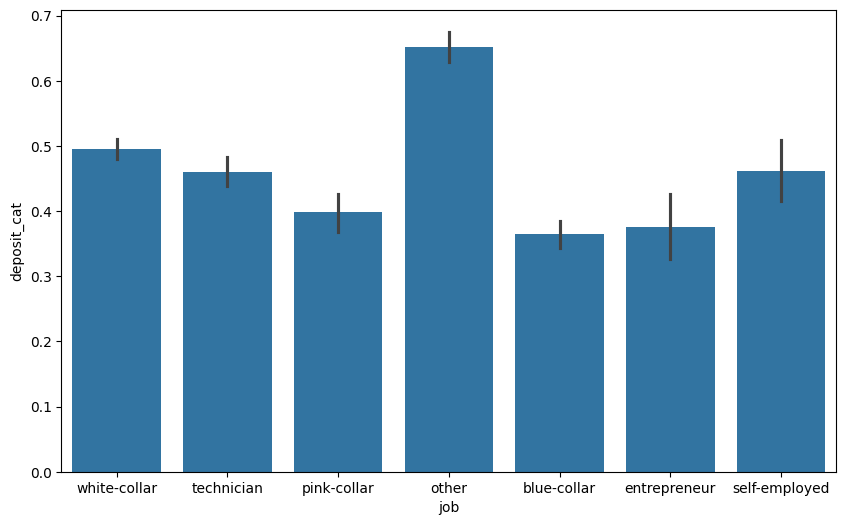

In [42]:
plt.figure(figsize = (10,6))
sns.barplot(x='job', y = 'deposit_cat', data = bank_data)

<Axes: xlabel='poutcome', ylabel='duration'>

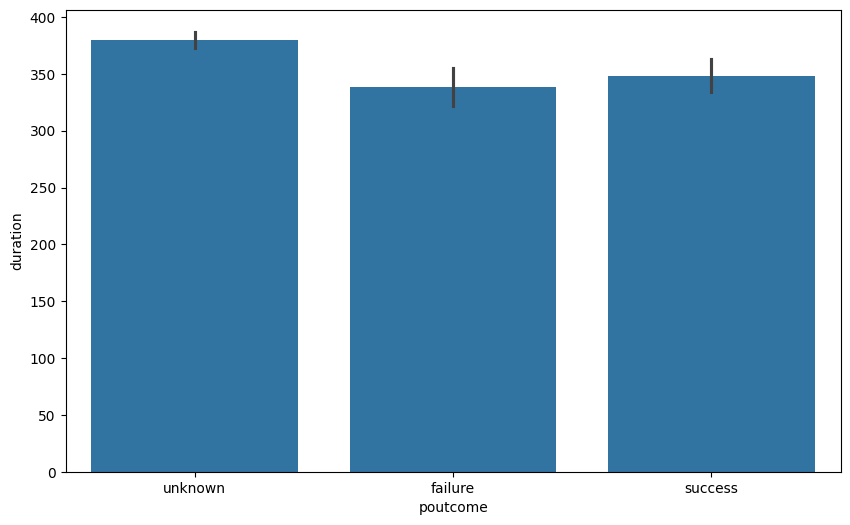

In [43]:
plt.figure(figsize = (10,6))
sns.barplot(x='poutcome', y = 'duration', data = bank_data)

In [44]:
bankcl = bank_with_dummies

In [45]:
corr = bankcl.corr()
corr

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
age,1.000000,0.112300,0.000189,-0.005278,0.020169,-0.011425,-0.168700,-0.031418,0.034901,0.019102,...,0.186349,0.318436,-0.467799,0.231150,-0.094400,-0.101372,0.077761,-0.008071,0.062114,-0.038992
balance,0.112300,1.000000,0.022436,-0.013894,0.030805,-0.060954,-0.077092,-0.084589,0.081129,-0.004379,...,-0.017586,0.025431,-0.014994,-0.000673,-0.070609,0.069128,0.014596,0.001695,0.045603,-0.034524
duration,0.000189,0.022436,1.000000,-0.041557,-0.026716,-0.009760,0.035051,-0.001914,0.451919,-0.014868,...,0.021364,-0.036179,0.023847,0.013405,0.003820,-0.006813,-0.015887,-0.033966,-0.022578,0.042725
campaign,-0.005278,-0.013894,-0.041557,1.000000,-0.049699,0.030975,0.006660,0.034722,-0.128081,-0.026296,...,-0.006828,0.047722,-0.046165,0.019915,-0.013834,-0.005427,0.012976,-0.080188,-0.091807,0.128907
previous,0.020169,0.030805,-0.026716,-0.049699,1.000000,-0.035273,-0.000840,-0.022668,0.139867,0.122076,...,-0.026566,-0.005176,0.023817,-0.024852,-0.004620,0.028146,-0.011898,0.335870,0.325477,-0.496921
default_cat,-0.011425,-0.060954,-0.009760,0.030975,-0.035273,1.000000,0.011076,0.076434,-0.040680,-0.011290,...,0.019633,-0.006819,-0.006255,0.013858,-0.000618,-0.011768,0.005421,-0.024650,-0.040272,0.048403
housing_cat,-0.168700,-0.077092,0.035051,0.006660,-0.000840,0.011076,1.000000,0.076761,-0.203888,-0.029350,...,0.007430,0.036305,-0.043817,0.017002,0.118514,-0.114955,-0.053191,0.087741,-0.136299,0.031375
loan_cat,-0.031418,-0.084589,-0.001914,0.034722,-0.022668,0.076434,0.076761,1.000000,-0.110580,-0.012697,...,0.026463,0.044148,-0.065288,0.006854,0.079583,-0.067513,-0.050249,0.006264,-0.080370,0.053686
deposit_cat,0.034901,0.081129,0.451919,-0.128081,0.139867,-0.040680,-0.203888,-0.110580,1.000000,0.034457,...,0.005228,-0.092157,0.094632,-0.063002,-0.051952,0.094598,0.014355,0.020714,0.286642,-0.224785
recent_pdays,0.019102,-0.004379,-0.014868,-0.026296,0.122076,-0.011290,-0.029350,-0.012697,0.034457,1.000000,...,-0.020253,0.009583,0.003736,-0.007034,-0.017129,0.017346,0.013590,0.051422,0.119598,-0.126890


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

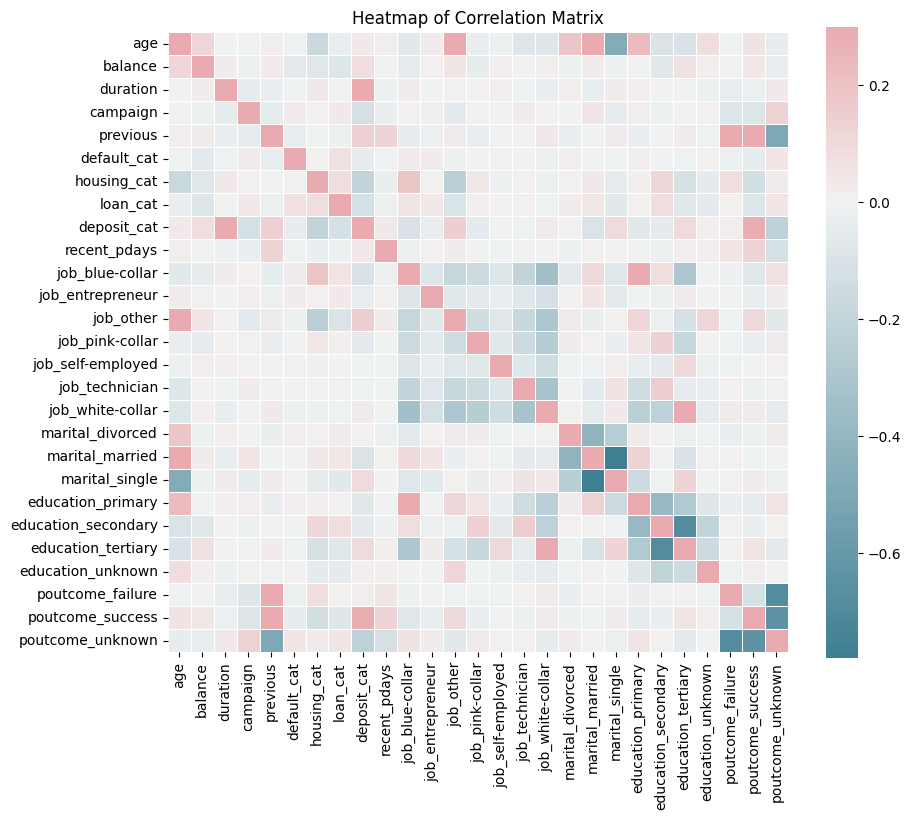

In [46]:
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [47]:
corr_deposite = pd.DataFrame(corr['deposit_cat'].drop('deposit_cat'))
corr_deposite.sort_values(by = 'deposit_cat', ascending = False)

,deposit_cat
duration,0.451919
poutcome_success,0.286642
job_other,0.144408
previous,0.139867
marital_single,0.094632
education_tertiary,0.094598
balance,0.081129
age,0.034901
recent_pdays,0.034457
job_white-collar,0.031621


In [50]:
data_drop_deposite = bankcl.drop('deposit_cat', axis=1)
label = bankcl.deposit_cat
data_train, data_test, label_train, label_test = train_test_split(data_drop_deposite, label, test_size = 0.2, random_state = 50)

In [51]:
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
dt2.fit(data_train, label_train)
dt2_score_train = dt2.score(data_train, label_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(data_test, label_test)
print("Testing score: ",dt2_score_test)

Training score:  0.7285250307985217
Testing score:  0.7268248992386923


In [53]:
dt3 = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
dt3.fit(data_train, label_train)
dt3_score_train = dt3.score(data_train, label_train)
print("Training score: ",dt3_score_train)
dt3_score_test = dt3.score(data_test, label_test)
print("Testing score: ",dt3_score_test)

Training score:  0.770411020271027
Testing score:  0.7572772055530677


In [52]:
dt4 = tree.DecisionTreeClassifier(random_state=1, max_depth=4)
dt4.fit(data_train, label_train)
dt4_score_train = dt4.score(data_train, label_train)
print("Training score: ",dt4_score_train)
dt4_score_test = dt4.score(data_test, label_test)
print("Testing score: ",dt4_score_test)

Training score:  0.7885541494008288
Testing score:  0.774294670846395


In [54]:
dt6 = tree.DecisionTreeClassifier(random_state=1, max_depth=6)
dt6.fit(data_train, label_train)
dt6_score_train = dt6.score(data_train, label_train)
print("Training score: ",dt6_score_train)
dt6_score_test = dt6.score(data_test, label_test)
print("Testing score: ",dt6_score_test)

Training score:  0.8080412140217269
Testing score:  0.7796686072548141


In [55]:
dt1 = tree.DecisionTreeClassifier()
dt1.fit(data_train, label_train)
dt1_score_train = dt1.score(data_train, label_train)
print("Training score: ", dt1_score_train)
dt1_score_test = dt1.score(data_test, label_test)
print("Testing score: ", dt1_score_test)

Training score:  1.0
Testing score:  0.7357814599193909


In [56]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1} {:>25} {:>20}'.format(2, dt2_score_train, dt2_score_test))
print('{:1} {:>25} {:>20}'.format(3, dt3_score_train, dt3_score_test))
print('{:1} {:>25} {:>20}'.format(4, dt4_score_train, dt4_score_test))
print('{:1} {:>25} {:>20}'.format(6, dt6_score_train, dt6_score_test))
print('{:1} {:>23} {:>20}'.format("max", dt1_score_train, dt1_score_test))

depth      Training score       Testing score       
-----      --------------       -------------       
2        0.7285250307985217   0.7268248992386923
3         0.770411020271027   0.7572772055530677
4        0.7885541494008288    0.774294670846395
6        0.8080412140217269   0.7796686072548141
max                     1.0   0.7357814599193909


In [57]:
features = bankcl.columns.tolist()

In [58]:
dt2.classes_

array([0, 1])

In [59]:
features = data_drop_deposite.columns.tolist()

features

['age',
 'balance',
 'duration',
 'campaign',
 'previous',
 'default_cat',
 'housing_cat',
 'loan_cat',
 'recent_pdays',
 'job_blue-collar',
 'job_entrepreneur',
 'job_other',
 'job_pink-collar',
 'job_self-employed',
 'job_technician',
 'job_white-collar',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'poutcome_failure',
 'poutcome_success',
 'poutcome_unknown']

In [60]:
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
dt2.fit(data_train, label_train)

fi = dt2.feature_importances_

l = len(features)
for i in range(0,len(features)):
    print('{:.<20} {:3}'.format(features[i],fi[i]))

age................. 0.0
balance............. 0.0
duration............ 0.849306123902405
campaign............ 0.0
previous............ 0.0
default_cat......... 0.0
housing_cat......... 0.0
loan_cat............ 0.0
recent_pdays........ 0.0
job_blue-collar..... 0.0
job_entrepreneur.... 0.0
job_other........... 0.0
job_pink-collar..... 0.0
job_self-employed... 0.0
job_technician...... 0.0
job_white-collar.... 0.0
marital_divorced.... 0.0
marital_married..... 0.0
marital_single...... 0.0
education_primary... 0.0
education_secondary. 0.0
education_tertiary.. 0.0
education_unknown... 0.0
poutcome_failure.... 0.0
poutcome_success.... 0.15069387609759496
poutcome_unknown.... 0.0


In [61]:
print("Mean duration   : ", data_drop_deposite.duration.mean())
print("Maximun duration: ", data_drop_deposite.duration.max())
print("Minimum duration: ", data_drop_deposite.duration.min())

Mean duration   :  371.99381831213043
Maximun duration:  3881
Minimum duration:  2


In [62]:
print(dt2.predict_proba(np.array([0, 0, 371, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))
print(dt2.predict(np.array([0, 0, 371, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))

[[0.48515568 0.51484432]]
[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [63]:
print(dt2.predict_proba(np.array([0, 0, 3881, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))
print(dt2.predict(np.array([0, 0, 3881, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))

[[0.19295499 0.80704501]]
[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [64]:
data_drop_deposite.iloc[985]

age                          46
balance                    3354
duration                    522
campaign                      1
previous                      1
default_cat                   0
housing_cat                   1
loan_cat                      0
recent_pdays           0.005747
job_blue-collar           False
job_entrepreneur          False
job_other                  True
job_pink-collar           False
job_self-employed         False
job_technician            False
job_white-collar          False
marital_divorced           True
marital_married           False
marital_single            False
education_primary         False
education_secondary        True
education_tertiary        False
education_unknown         False
poutcome_failure          False
poutcome_success           True
poutcome_unknown          False
Name: 985, dtype: object

In [65]:
print(dt2.predict_proba(np.array([46,3354,522,1,1,0,1,0,0.005747,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0]).reshape(1, -1)))

[[0.19295499 0.80704501]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [66]:
preds = dt2.predict(data_test)
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(label_test, preds)))
probs = dt2.predict_proba(data_test)[:,1]
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(label_test, probs)))


Accuracy score: 
0.7268248992386923

Area Under Curve: 
0.7880265888143609
